In [2]:
# Create Latitude and Longitude Combinations
# Import the dependencies
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from citipy import citipy

In [3]:
# Create a set of random latitude and longitude combinations.
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)
lat_lngs

In [4]:
# Add the latitudes and longitudes to a list.
coordinates = list(lat_lngs)

In [5]:
# Create a list for holding the cities.
cities = []
# Identify the nearest city for each latitude and longitude combination.
for coordinate in coordinates:
    city = citipy.nearest_city(coordinate[0], coordinate[1]).city_name

    # If the city is unique, then we will add it to the cities list.
    if city not in cities:
        cities.append(city)
# Print the city count to confirm sufficient count.
len(cities)

635

In [6]:
# Import the requests library.
import requests

# Import the API key.
from config import weather_api_key

In [7]:
# Starting URL for Weather Map API Call.
url = "http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=" + weather_api_key
print(url)

http://api.openweathermap.org/data/2.5/weather?units=Imperial&APPID=60c3238bd9569afad5e06a14acefe4ce


In [8]:
# Import the datetime module from the datetime library.
from datetime import datetime

In [9]:
# Create an empty list to hold the weather data.
city_data = []
# Print the beginning of the logging.
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters.
record_count = 1
set_count = 1
    
# Loop through all the cities in the list.
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes.
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1
    # Create endpoint URL with each city.
    city_url = url + "&q=" + city.replace(" ","+")

    # Log the URL, record, and set numbers and the city.
    print(f"Processing Record {record_count} of Set {set_count} | {city}")
    # Add 1 to the record count.
    record_count += 1
    
# Run an API request for each of the cities.
    try:
        # Parse the JSON and retrieve data.
        city_weather = requests.get(city_url).json()
        # Parse out the needed data.
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        # Convert the date to ISO standard.
        city_date = datetime.utcfromtimestamp(city_weather["dt"]).strftime('%Y-%m-%d %H:%M:%S')
        # Append the city information into city_data list.
        city_data.append({"City": city.title(),
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

# If an error is experienced, skip the city.
    except:
        print("City not found. Skipping...")
        pass

# Indicate that Data Loading is complete.
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | qaqortoq
Processing Record 2 of Set 1 | mataura
Processing Record 3 of Set 1 | turinsk
Processing Record 4 of Set 1 | palabuhanratu
City not found. Skipping...
Processing Record 5 of Set 1 | dikson
Processing Record 6 of Set 1 | amderma
City not found. Skipping...
Processing Record 7 of Set 1 | punta arenas
Processing Record 8 of Set 1 | vanimo
Processing Record 9 of Set 1 | talnakh
Processing Record 10 of Set 1 | hobart
Processing Record 11 of Set 1 | sisimiut
Processing Record 12 of Set 1 | taolanaro
City not found. Skipping...
Processing Record 13 of Set 1 | berlevag
Processing Record 14 of Set 1 | saint-philippe
Processing Record 15 of Set 1 | basoko
Processing Record 16 of Set 1 | georgetown
Processing Record 17 of Set 1 | sistranda
Processing Record 18 of Set 1 | aporawan
City not found. Skipping...
Processing Record 19 of Set 1 | jamestown
Processing Record 20 of Set 1 | albany
Processing 

Processing Record 37 of Set 4 | isla vista
Processing Record 38 of Set 4 | clyde river
Processing Record 39 of Set 4 | aykhal
Processing Record 40 of Set 4 | syamzha
Processing Record 41 of Set 4 | ca mau
Processing Record 42 of Set 4 | qaanaaq
Processing Record 43 of Set 4 | konevo
Processing Record 44 of Set 4 | geraldton
Processing Record 45 of Set 4 | samarai
Processing Record 46 of Set 4 | bazarnyy karabulak
Processing Record 47 of Set 4 | wangdiphodrang
City not found. Skipping...
Processing Record 48 of Set 4 | dondo
Processing Record 49 of Set 4 | dingle
Processing Record 50 of Set 4 | new norfolk
Processing Record 1 of Set 5 | syracuse
Processing Record 2 of Set 5 | moroni
Processing Record 3 of Set 5 | dangara
Processing Record 4 of Set 5 | baruun-urt
Processing Record 5 of Set 5 | show low
Processing Record 6 of Set 5 | san patricio
Processing Record 7 of Set 5 | sovetskiy
Processing Record 8 of Set 5 | khatanga
Processing Record 9 of Set 5 | pudozh
Processing Record 10 of S

Processing Record 28 of Set 8 | colac
Processing Record 29 of Set 8 | harbour breton
Processing Record 30 of Set 8 | port macquarie
Processing Record 31 of Set 8 | halalo
City not found. Skipping...
Processing Record 32 of Set 8 | dzilam gonzalez
Processing Record 33 of Set 8 | alofi
Processing Record 34 of Set 8 | tran
Processing Record 35 of Set 8 | svetlogorsk
Processing Record 36 of Set 8 | ewa beach
Processing Record 37 of Set 8 | irbit
Processing Record 38 of Set 8 | bambanglipuro
Processing Record 39 of Set 8 | havelock
Processing Record 40 of Set 8 | hibbing
Processing Record 41 of Set 8 | linares
Processing Record 42 of Set 8 | brisbane
Processing Record 43 of Set 8 | kirsanov
Processing Record 44 of Set 8 | quezaltepeque
Processing Record 45 of Set 8 | tepalcatepec
Processing Record 46 of Set 8 | port blair
Processing Record 47 of Set 8 | naze
Processing Record 48 of Set 8 | baker
Processing Record 49 of Set 8 | caravelas
Processing Record 50 of Set 8 | kahului
Processing Rec

Processing Record 13 of Set 12 | tupa
Processing Record 14 of Set 12 | touros
Processing Record 15 of Set 12 | nguiu
City not found. Skipping...
Processing Record 16 of Set 12 | bucerias
Processing Record 17 of Set 12 | ust-ilimsk
Processing Record 18 of Set 12 | panguna
Processing Record 19 of Set 12 | springdale
Processing Record 20 of Set 12 | meulaboh
Processing Record 21 of Set 12 | umm ruwabah
City not found. Skipping...
Processing Record 22 of Set 12 | yurginskoye
Processing Record 23 of Set 12 | bambous virieux
Processing Record 24 of Set 12 | abonnema
Processing Record 25 of Set 12 | kecskemet
Processing Record 26 of Set 12 | waling
Processing Record 27 of Set 12 | panzhihua
Processing Record 28 of Set 12 | nhulunbuy
Processing Record 29 of Set 12 | yatou
Processing Record 30 of Set 12 | duyun
Processing Record 31 of Set 12 | luganville
Processing Record 32 of Set 12 | coquimbo
Processing Record 33 of Set 12 | pulandian
Processing Record 34 of Set 12 | kampong thum
Processing 

In [10]:
len(city_data)

573

In [11]:
# Convert the array of dictionaries to a Pandas DataFrame.
city_data_df = pd.DataFrame(city_data)
city_data_df.head(10)

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Qaqortoq,60.7167,-46.0333,55.90,83,80,1.97,GL,2021-07-29 22:35:55
1,Mataura,-46.1927,168.8643,44.47,78,86,4.59,NZ,2021-07-29 22:35:56
2,Turinsk,58.0458,63.6960,52.16,98,84,4.59,RU,2021-07-29 22:35:56
3,Dikson,73.5069,80.5464,44.06,80,100,14.12,RU,2021-07-29 22:35:57
4,Punta Arenas,-53.1500,-70.9167,39.31,81,0,18.41,CL,2021-07-29 22:35:57
5,Vanimo,-2.6741,141.3028,79.77,88,64,3.98,PG,2021-07-29 22:35:57
6,Talnakh,69.4865,88.3972,60.19,77,99,2.62,RU,2021-07-29 22:35:58
7,Hobart,-42.8794,147.3294,47.12,80,75,1.99,AU,2021-07-29 22:32:43
8,Sisimiut,66.9395,-53.6735,50.77,67,89,4.88,GL,2021-07-29 22:31:08
9,Berlevag,70.8578,29.0864,44.06,88,100,5.08,NO,2021-07-29 22:35:58


In [12]:
new_column_order = ["City", "Country", "Date", "Lat", "Lng", "Max Temp", "Humidity", "Cloudiness", "Wind Speed"]

In [13]:
city_data_df = city_data_df[new_column_order]

In [14]:
city_data_df.head()

,City,Country,Date,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed
0,Qaqortoq,GL,2021-07-29 22:35:55,60.7167,-46.0333,55.90,83,80,1.97
1,Mataura,NZ,2021-07-29 22:35:56,-46.1927,168.8643,44.47,78,86,4.59
2,Turinsk,RU,2021-07-29 22:35:56,58.0458,63.6960,52.16,98,84,4.59
3,Dikson,RU,2021-07-29 22:35:57,73.5069,80.5464,44.06,80,100,14.12
4,Punta Arenas,CL,2021-07-29 22:35:57,-53.1500,-70.9167,39.31,81,0,18.41


In [15]:
# Create the output file (CSV).
output_data_file = "weather_data/cities.csv"
# Export the City_Data into a CSV.
city_data_df.to_csv(output_data_file, index_label="City_ID")

In [16]:
# Extract relevant fields from the DataFrame for plotting.
lats = city_data_df["Lat"]
max_temps = city_data_df["Max Temp"]
humidity = city_data_df["Humidity"]
cloudiness = city_data_df["Cloudiness"]
wind_speed = city_data_df["Wind Speed"]

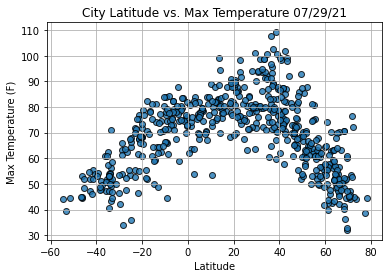

In [17]:
# Import time module
import time

# Build the scatter plot for latitude vs. max temperature.
plt.scatter(lats,
            max_temps,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Max Temperature "+ time.strftime("%x"))
plt.ylabel("Max Temperature (F)")
plt.xlabel("Latitude")
plt.grid(True)

# Save the figure.
plt.savefig("weather_data/Fig1.png")

# Show plot.
plt.show()

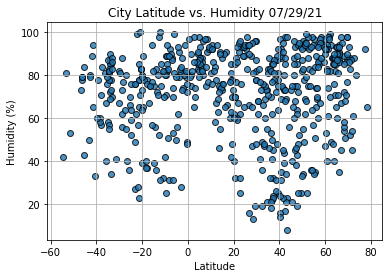

In [18]:
# Build the scatter plots for latitude vs. humidity.
plt.scatter(lats,
            humidity,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Humidity "+ time.strftime("%x"))
plt.ylabel("Humidity (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig2.png")
# Show plot.
plt.show()

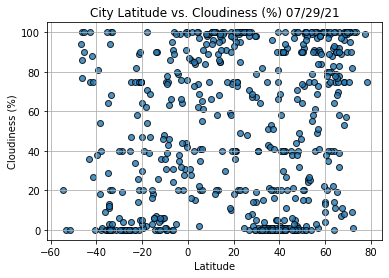

In [19]:
# Build the scatter plots for latitude vs. cloudiness.
plt.scatter(lats,
            cloudiness,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Cloudiness (%) "+ time.strftime("%x"))
plt.ylabel("Cloudiness (%)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig3.png")
# Show plot.
plt.show()

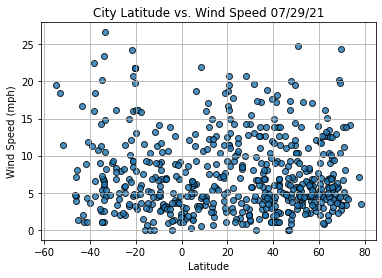

In [20]:
# Build the scatter plots for latitude vs. wind speed.
plt.scatter(lats,
            wind_speed,
            edgecolor="black", linewidths=1, marker="o",
            alpha=0.8, label="Cities")

# Incorporate the other graph properties.
plt.title(f"City Latitude vs. Wind Speed "+ time.strftime("%x"))
plt.ylabel("Wind Speed (mph)")
plt.xlabel("Latitude")
plt.grid(True)
# Save the figure.
plt.savefig("weather_data/Fig4.png")
# Show plot.
plt.show()